# Classification of Arrhythmia


The dataset used in this project is available on the UCI machine learning Repository.

   - it consits of 452 different examples spread over 16 classes. of the 452 examples.
   - 245 are of normal people.we also have 12 different types of arrhythmias.
   - Among this types of arrhythmias the most representative are the 'coronary artery disease' and 'Rjgbt boundle branch block'.
   - We have 279 features, which include age,sex,weight,height of patients and other related information.We explicitly observe that the number of features is relatively high compared to the number of examples.
   - Our goal for the project is to predict if a person is suffering from arrhythmia or not and if yes,classify it in to one of the 12 available groups.

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.impute import SimpleImputer
import math as mt


### Reading the data

In [2]:
df=pd.read_csv(r"C:\Users\CHARLES\Desktop\New folder\arrhythmia.data",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


### Basic Description of dataframe

In [5]:
#dimension of dataset
df.shape

(452, 280)

In [6]:
#concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [7]:
#descriptive statistical of dataframe 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Data Preprocessing 
### Handling Missing values 


In [8]:
#cheaking for missing values in the dataset 
df.isnull().sum().sum()

0

In [9]:
#replacing ? with np.nan value
df=df.replace('?',np.NaN)


In [10]:
#total number of null values in the dataset
mv=df.isnull().sum().sum()
mv

408

In [11]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279],
      dtype='int64', length=280)

## Visualizing the distribution of missing data

Text(0, 0.5, 'Total number of null value in each column')

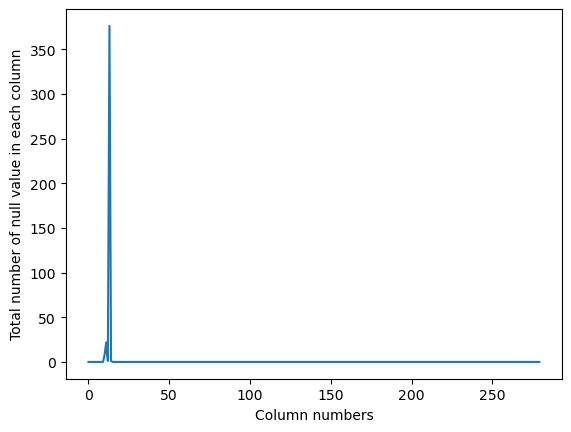

In [12]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')

Text(0.5, 0, 'Column numbers')

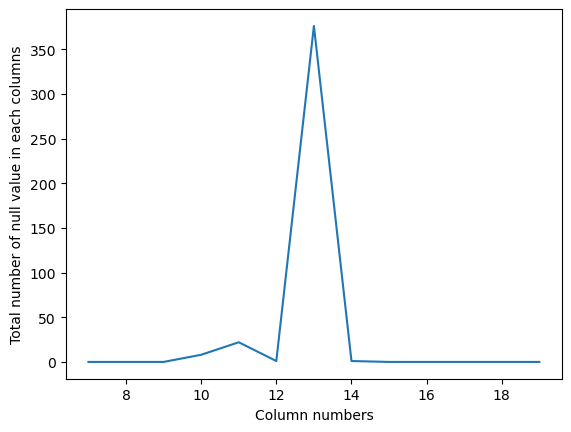

In [13]:
#zooming in 
pd.isnull(df).sum()[7:20].plot(kind='line')
plt.ylabel('Total number of null value in each columns')
plt.xlabel('Column numbers')

column number 13 contain more than 350 missing values out of 452 instances. so we will drop column 13. Other attributes have comparatively less null values. so instead od droping we will replace the null values of other attributes with the mean values.


In [14]:
#droping column number 13
df.drop(columns=(13),inplace=True)

### Using the mean strategy for imputation 


In [15]:
#makeing a copy to avoid changing original data (when imputing)
new_df=df.copy()

In [16]:
#making new columns indicating what will be inputed 
cols_with_missing=(col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col]=new_df[col].isnull()

In [17]:
#imputation 
#my_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
my_imputer=SimpleImputer()
new_df=pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns=df.columns

In [18]:
#imputed dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [19]:
#dataset with zero missing value 
new_df.isnull().sum().sum()

0

### Generating the final dataset

In [20]:
#creating column names 
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [21]:
#Adding column names to dataset
new_df.columns=final_df_columns
new_df.to_csv('New data with target class.csv')

In [22]:
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


As the data frame is cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [23]:
target=new_df['class']
final_df=new_df.drop(columns=('class'))

In [24]:
final_df.shape

(452, 278)

In [25]:
target.shape

(452,)

## Exploratory Data Analysis (EDA)

In [26]:
#List of class names 
class_names=[
                'Normal',			         
                'Ischemic changes (Coronary Artery Disease)',  
                'Old Anterior Myocardial Infarction',          
                'Old Inferior Myocardial Infarction',         
                'Sinus tachycardy',			           
                'Sinus bradycardy',			           
                'Ventricular Premature Contraction (PVC)',      
                'Supraventricular Premature Contraction',	    
                'Left bundle branch block', 		            
                'Right bundle branch block',	           
                '1.degree AtrioVentricular block',	            
                '2.degree AV block',		            
                '3.degree AV block',		            
                'Left ventricule hypertrophy', 	            
                'Atrial Fibrillation or Flutter',	            
                'Others',				
]

### Analyzing the dataset and check how many exaples we have for each class:

In [27]:
t=new_df.sort_values(by=['class'])

In [28]:
#Counting the number of instances for each class
la=t['class'].value_counts(sort=False).tolist()

In [29]:
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

<Axes: xlabel='class', ylabel='count'>

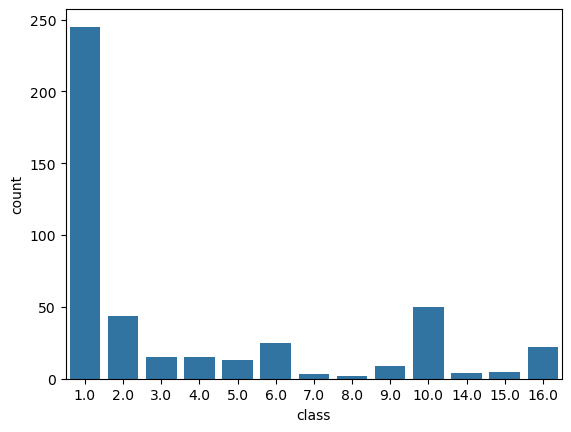

In [30]:
sns.countplot(x='class',data=new_df)

In [31]:
values=la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


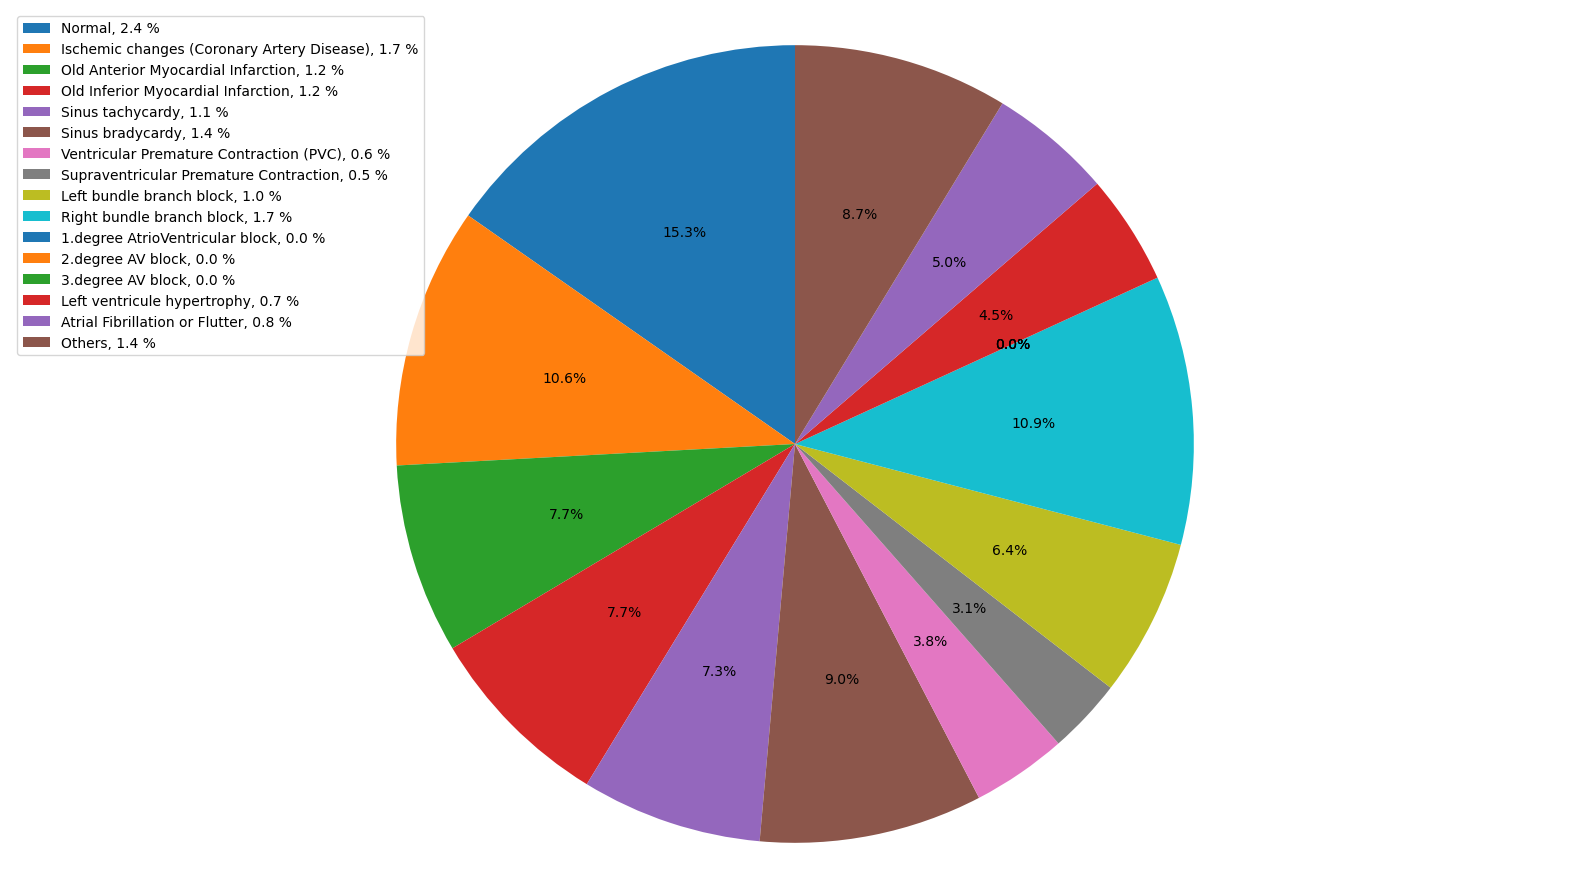

In [32]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

# Handling Outliers and Data Visualization 

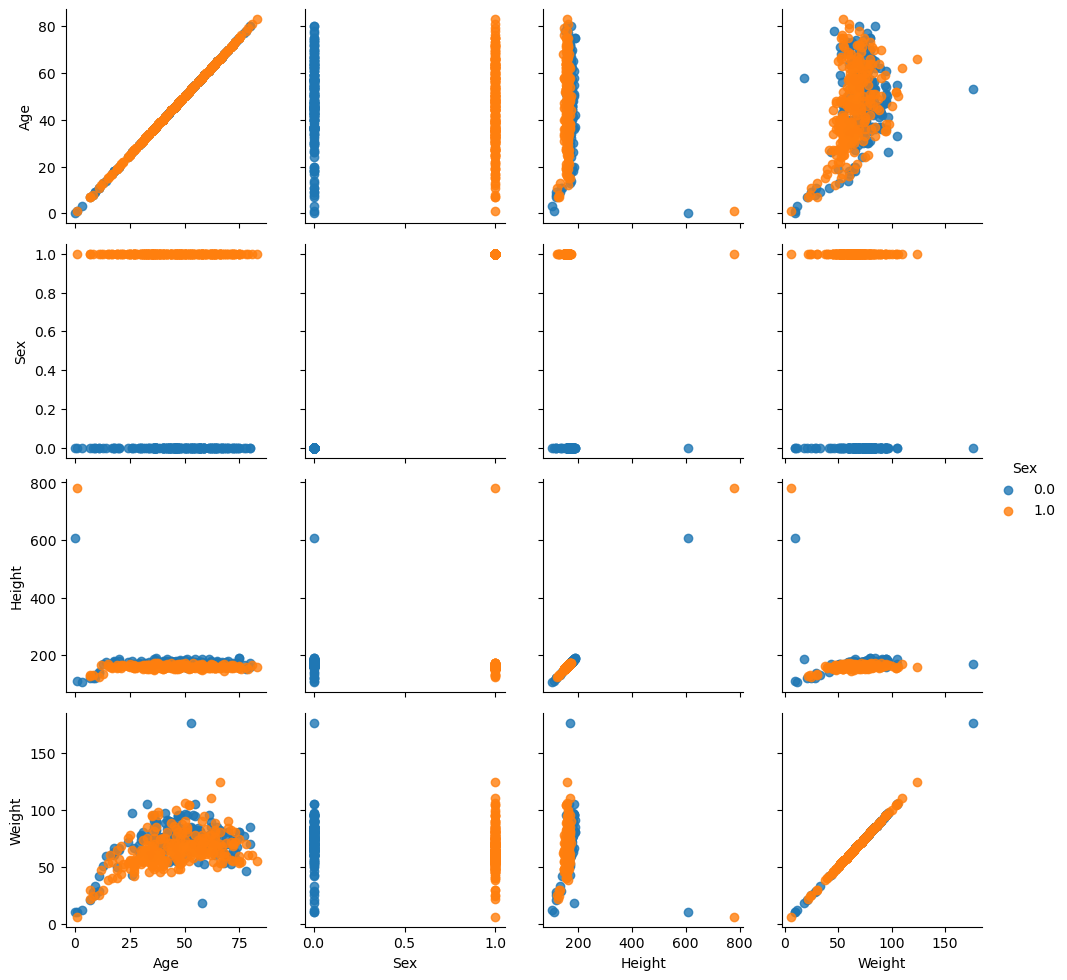

In [33]:
#looking for pairwise relationship and outliers 
g=sns.PairGrid(final_df,vars=['Age','Sex','Height','Weight'],hue='Sex')
g.map(plt.scatter,alpha=0.8)
g.add_legend()

According to the sccater plots above, there are few outliers in 'height' and 'weight' attributes cheaking the max  of height and weights

In [34]:
sorted(final_df['Height'],reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest ever lived in the world was 272cm(1940). His followea were 267 cm (1905) and 263.5cm (1969)
replacing 780 and 608 with 180 and 108 cm respectively.

In [35]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [36]:
sorted(final_df['Weight'],reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

176 Kgs is a possible weight.so we will keep them in the dataframe

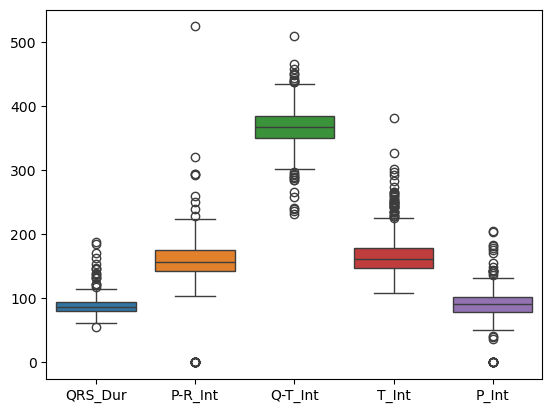

In [37]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);


PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.

Text(0, 0.5, 'Counts')

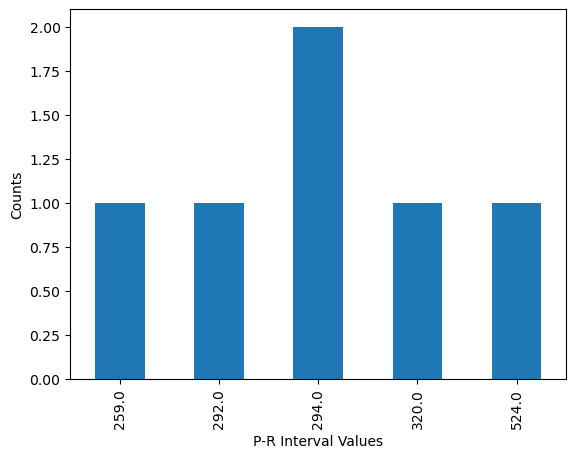

In [38]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Counts')

PR Interval data is including Outliers 0(*18) we will keep them 

<Axes: >

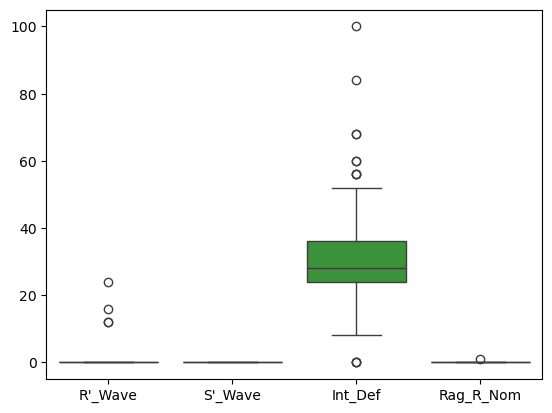

In [39]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

S'Wave has 0,s which is not a NaN. So, we can't assume it as including outliers.

In [40]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [41]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

```V101``` has an outlier, but when we look at other sets(V201,V301,V501) we can see that there is an outlier similarly. Since our data is heavily biased,

In [42]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

In [43]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

In [44]:
final_df["V501"].value_counts().sort_index(ascending=False)


V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

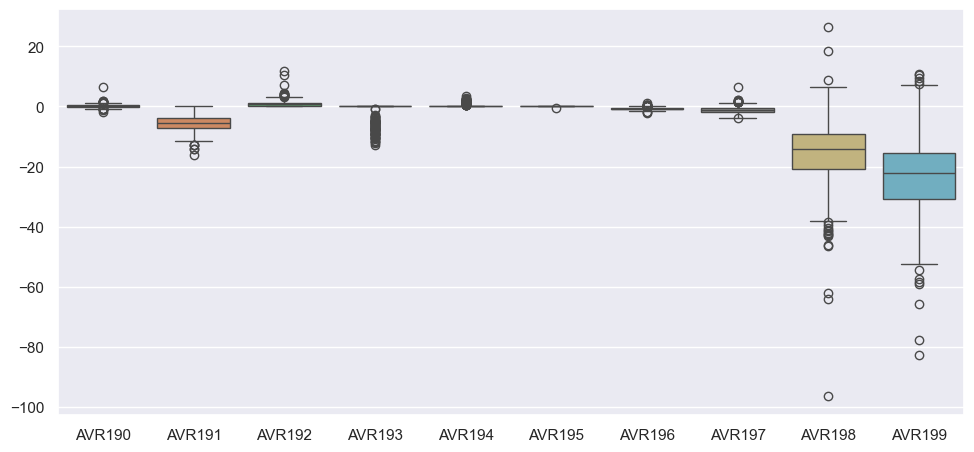

In [45]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

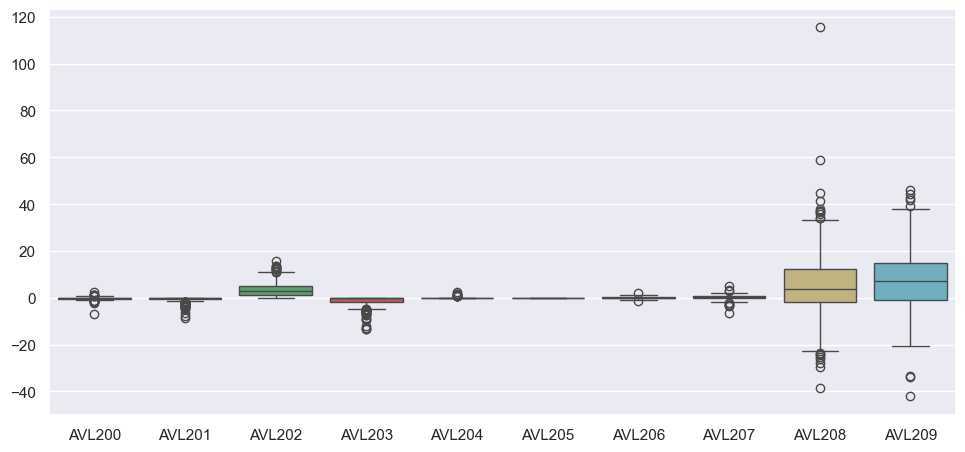

In [46]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

In [47]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

C:\Users\CHARLES\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\CHARLES\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling and Splitting the Dataset
we will be using 80% of our dataset for training purpose and 20% for the testing purpose.

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
 X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=1)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [52]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation Strategy
As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

In [53]:
# importing evaluation metrics 
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,recall_score,precision_score,confusion_matrix,classification_report


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay


# Modeling 

In [55]:
# we will store results for each model.
result=pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

In [56]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred=knnclassifier.predict(X_test)

In [57]:
knn_train_accuracy=accuracy_score(y_train,knnclassifier.predict(X_train))
knn_test_accuracy=accuracy_score(y_test,knnclassifier.predict(X_test))
knn_train_recall=recall_score(y_train,knnclassifier.predict(X_train),average='weighted')
knn_test_recall=recall_score(y_test,knnclassifier.predict(X_test),average='weighted')


In [58]:
print('Train Recall Score: {}'.format(knn_train_recall))
print('Test Recall Score: {}'.format(knn_test_recall))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.6481994459833795
Test Recall Score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [59]:
new_row = pd.DataFrame([{'Model':'KNN Classifier',
                         'Train Accuracy': knn_train_accuracy,
                         'Test Accuracy': knn_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [60]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352


# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logclassifier=LogisticRegression(solver='saga',random_state=0)
logclassifier.fit(X_train,y_train)
y_pred=logclassifier.predict(X_test)


In [62]:
log_train_accuracy=accuracy_score(y_train,logclassifier.predict(X_train))
log_test_accuracy=accuracy_score(y_test,logclassifier.predict(X_test))
log_train_recall=recall_score(y_train,logclassifier.predict(X_train),average='weighted')
log_test_recall=recall_score(y_test,logclassifier.predict(X_test),average='weighted')

In [63]:
print('Train Recall Score: {}'.format(log_train_recall))
print('Test Recall Score: {}'.format(log_test_recall))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.9390581717451524
Test Recall Score: 0.7802197802197802


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [64]:
new_row = pd.DataFrame([{'Model':'Logistic Regression',
                         'Train Accuracy': log_train_accuracy,
                         'Test Accuracy': log_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [65]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logistic Regression,0.939058,0.780220


# Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=5)
dtclassifier.fit(X_train,y_train)
y_pred_test=dtclassifier.predict(X_test)
y_pred_train=dtclassifier.predict(X_train)

In [69]:
dt_train_accuracy=accuracy_score(y_train,dtclassifier.predict(X_train))
dt_test_accuracy=accuracy_score(y_test,dtclassifier.predict(X_test))
dt_train_recall=recall_score(y_train,dtclassifier.predict(X_train),average='weighted')
dt_test_recall=recall_score(y_test,dtclassifier.predict(X_test),average='weighted')

In [70]:
print('Train Recall Score: {}'.format(dt_train_recall))
print('Test Recall Score: {}'.format(dt_test_recall))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.7894736842105263
Test Recall Score: 0.6813186813186813


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [71]:
new_row = pd.DataFrame([{'Model':'Decision Tree Classifier',
                         'Train Accuracy': dt_train_accuracy,
                         'Test Accuracy': dt_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [72]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logistic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319


# Linear SVM

In [73]:
from sklearn.svm import LinearSVC
lsvmclassifer=LinearSVC(C=0.01)
lsvmclassifer.fit(X_train,y_train)
y_pred_test=lsvmclassifer.predict(X_test)
y_pred_train=lsvmclassifer.predict(X_train)

In [74]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [75]:
print('Train Recall Score: {}'.format(lsvc_train_recall))
print('Test Recall Score: {}'.format(lsvc_test_recall))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.8808864265927978
Test Recall Score: 0.7802197802197802


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [76]:
new_row = pd.DataFrame([{'Model':'Linear SVM',
                         'Train Accuracy': lsvc_train_accuracy,
                         'Test Accuracy': lsvc_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [77]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logistic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.880886,0.780220


# Kernelized SVM

In [78]:
from sklearn import svm
ksvm_clf=svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
ksvm_clf.fit(X_train,y_train)
y_pred_train=ksvm_clf.predict(X_train)
y_pred_test=ksvm_clf.predict(X_test)

In [79]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [80]:
print('Train Recall Score: {}'.format(ksvc_train_accuracy))
print('Test Recall Score: {}'.format(ksvc_test_accuracy))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.850415512465374
Test Recall Score: 0.7912087912087912


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [81]:
new_row = pd.DataFrame([{'Model':'Kernelized SVM',
                         'Train Accuracy': ksvc_train_accuracy,
                         'Test Accuracy': ksvc_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [85]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logistic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.880886,0.780220
4,Kernelized SVM,0.850416,0.791209


# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=300,criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,100
,max_leaf_nodes,30
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [88]:
print('Train Recall Score: {}'.format(rf_train_accuracy))
print('Test Recall Score: {}'.format(rf_test_accuracy))
confusion_matrix(y_test,y_pred)

Train Recall Score: 0.8808864265927978
Test Recall Score: 0.7472527472527473


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [89]:
new_row = pd.DataFrame([{'Model':'Random Forest Classifier',
                         'Train Accuracy': rf_train_accuracy,
                         'Test Accuracy': rf_test_accuracy}])

result = pd.concat([result, new_row], ignore_index=True)


In [90]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logistic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVM,0.880886,0.780220
4,Kernelized SVM,0.850416,0.791209
5,Random Forest Classifier,0.880886,0.747253


We find that the best model in term of recall score is Kernelized SVM with accuracy percentage of 79.12 over the other 